# **Context:**

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

# **Problem Statement:**

"Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

# **Objective:**

Predict which customer is more likely to purchase the newly introduced travel package.

# **Data Description:**

- CustomerID: Unique customer ID
- Age: Age of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- NumberOfTrips: Average number of trips in a year by customer
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- MonthlyIncome: Gross monthly income of the customer

**Categorical data:**
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- MaritalStatus: Marital status of customer
	- Single: Merely one without a partner
	- Divorced: Married but seperated 
	- Unmarried: Potentially have a partner but not be married
	- Married: Married with a partner
- Designation: Designation of the customer in the current organization

**Binary data:**
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)

**Customer interaction data:**

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [2]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

### Loading dataset

In [3]:
data=pd.read_excel('Tourism.xlsx')

### Overview dataset

In [4]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Understand the shape of the dataset

In [5]:
data.shape

(4888, 20)

- There are 4888 rows and 20 columns

### Check data types and number of non-null values for each column

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- Age, TypeofContact, DurationOfPitch, Number of followups, preferredpropertystar, numberoftrips, numberofchildrenvisiting, monthly income has missing values; will further check how many missing values are there per each columns by `isna()` method and take care of them later
- Most dataset types are int,float or object 

### Check sum of missing values per columns 

In [7]:
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

- Missing values will be taken care by imputing avg of each column if needed 

### Number of unique values in each column

In [8]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

- Can drop 'CustomerID' column as it is an ID variable and will not add value to the model
- Will leave 'MonthlyIncome' column even half of the dataset is unique because it can be an important factor of who is going to purchase the newly introduced travel package

### Summary of the dataset

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


**Observations:**

- The 'NumberOfTrips' column's 50% quartile value is 3 and there are no huge value gape between 25%~75% quartile. However, the max value is 22 which means there might be outliers in data 
- There might be outliers in 'DurationOfPitch' column: Avg value is 13 and max value is 127 which is incredibily high
- The values of 'PichSatisfactionScore' are well distributed from 1 to 5
- There might be outliers in 'MonthlyIncome' column since the avg is 22347 and max is 98678

## EDA
### Univariate analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="white"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="gray"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on Age

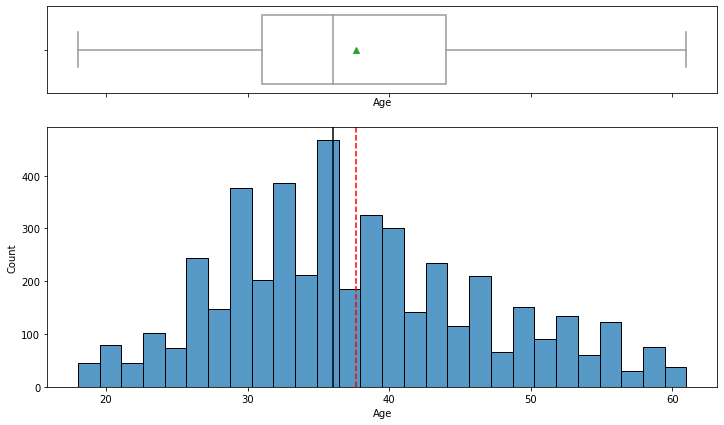

In [11]:
histogram_boxplot(data, 'Age')

- The Age has an approx symmetric distribution with mean and median close to 38-39 yrs old
- As evident from the boxplot, there are no outliers in the distribution for this variable

#### Observations on NumberOfPersonVisiting

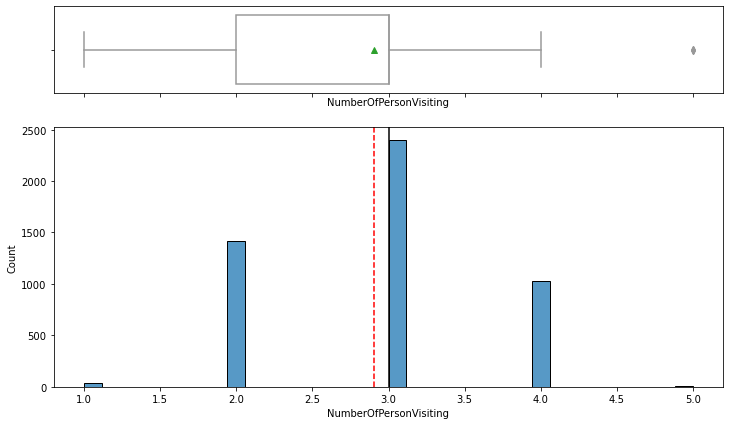

In [12]:
histogram_boxplot(data, 'NumberOfPersonVisiting')

- The value of mean and meadian are similar to 3
- There is an outlier value which is 5

#### Observation on PreferredPropertyStar

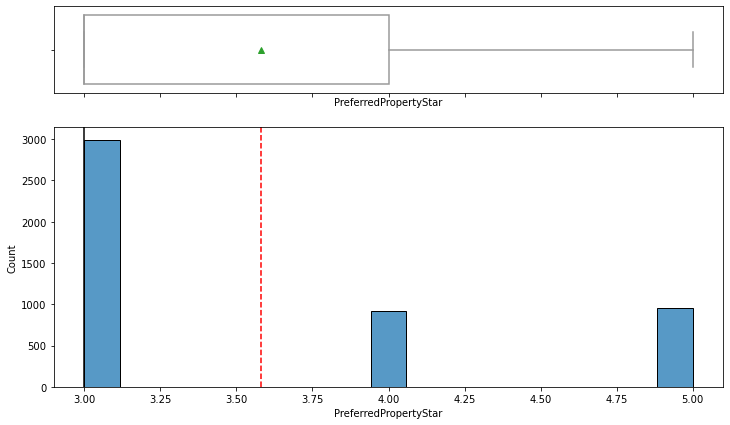

In [13]:
histogram_boxplot(data, 'PreferredPropertyStar')

- There is no outlier in this distribution
- The value of mean and median are not the same; The value of median is 3 and the mean value is in between 3.5 and 3.75

#### Observation on NumberOfTrips

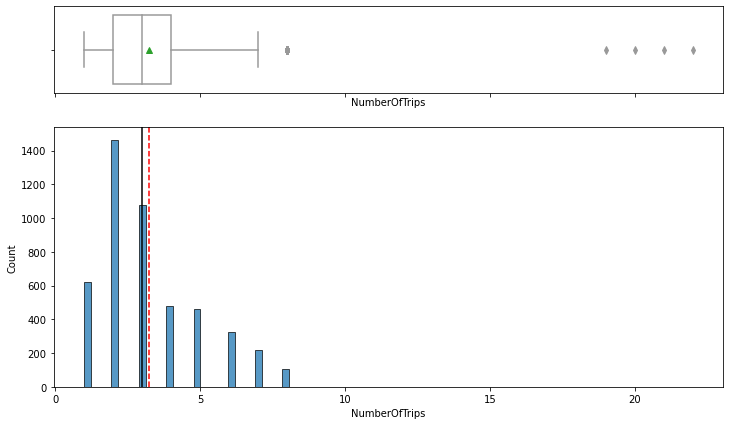

In [14]:
histogram_boxplot(data,'NumberOfTrips')

- NumberOfTrips has a right-skewed distribution and 2 has the highest count among all observations
- Distribution is not symmetric but mean and median are approx equal with a value approx. 3 
- There are many outliers in this variable

#### Observation on NumberOfChildrenVisiting

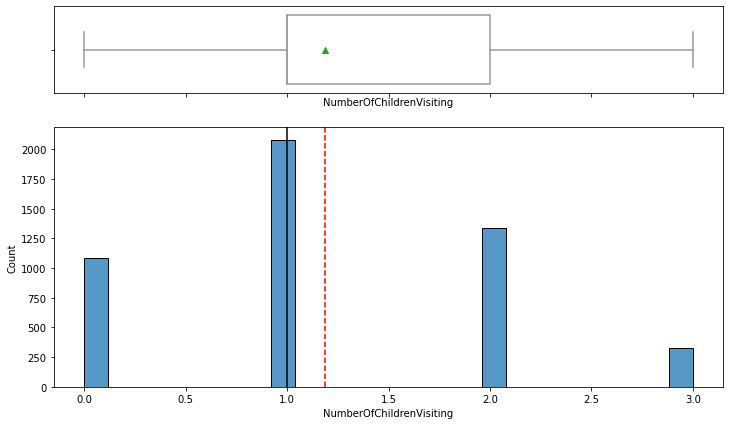

In [15]:
histogram_boxplot(data, 'NumberOfChildrenVisiting')

- NumberOfChildrenVisiting is evenly distributed and 1 has the highest count among all observations
- Distribution is not symmetric but mean and median are approx equal with a value approx. 1 
- There are no outliers in this distribution

#### Observation on MonthlyIncome

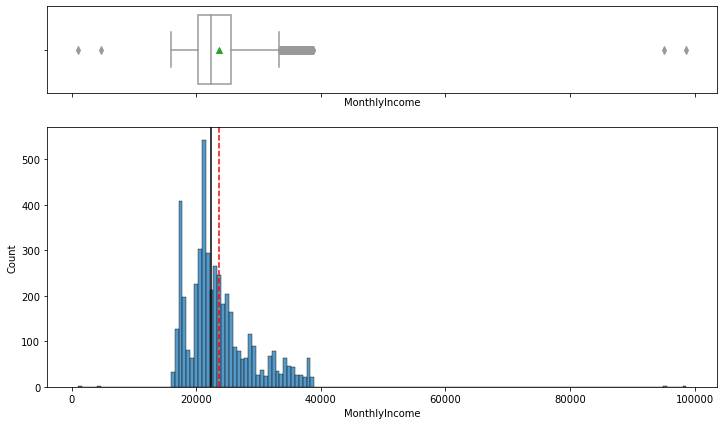

In [16]:
histogram_boxplot(data, 'MonthlyIncome')

- The distribution of the variable is skewed to the right and there are many extreme values around 40,000 and few on near 100,000.
- The mean and median value of the distribution is approx similar around 25,000 

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observation on TypeofContact

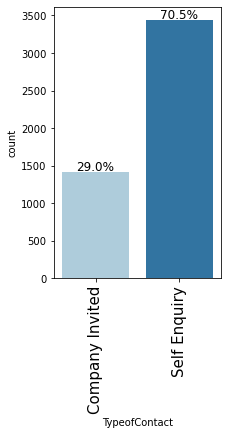

In [18]:
labeled_barplot(data,'TypeofContact',perc=True)

- Most of customers were contacted by customer itself
- Almost 1/3 of customers were contacted by company 

#### Observation on CityTier

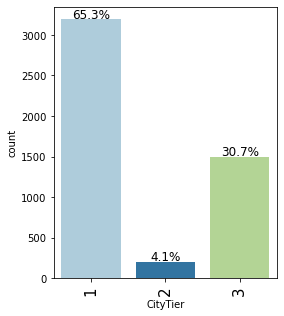

In [19]:
labeled_barplot(data,'CityTier',perc=True)

- Most of customers live in 'Tier 1' where development of a city, population, facilities, and living standards are the highest tier 
- There are few customers in 'Tier 2' 
- There are more customers from 'Tier 3' than 'Tier 2'

#### Observation on Occupation

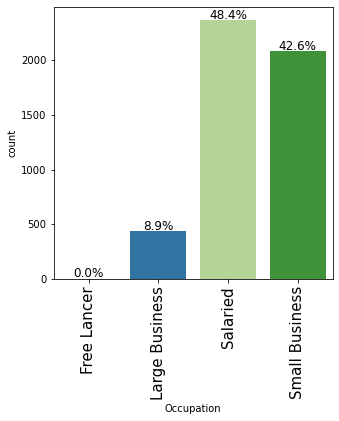

In [20]:
labeled_barplot(data,'Occupation',perc=True)

- There are no free lancer customers
- The most of customers occupations are salaried and owns small business
- There are few customers who owns large business

#### Observation on Gender

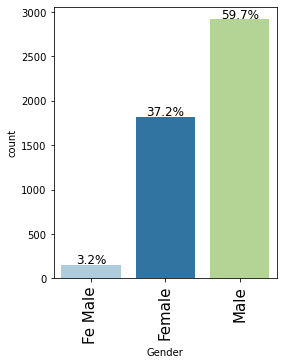

In [21]:
labeled_barplot(data,'Gender',perc=True)

- Need to change 'Fe Male' to 'Female' later in the data preparation section
- There is high percentage of Male than Female 

#### Observation on MaritalStatus

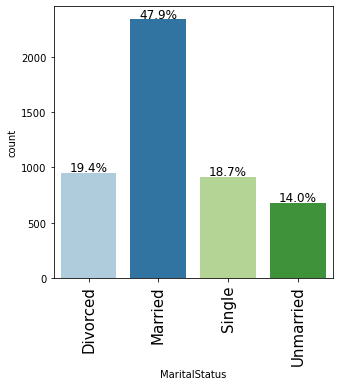

In [22]:
labeled_barplot(data,'MaritalStatus',perc=True)

- Most of users are Married
- Rest of categories have approx close percentages: Divorced, single, Unmarried

#### Observation on Designation

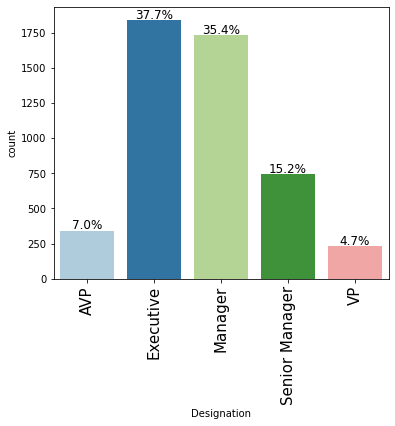

In [23]:
labeled_barplot(data,'Designation',perc=True)

- Most customers are executivse or managers
- There are few AVP and VP 

### Bivariate Analysis 

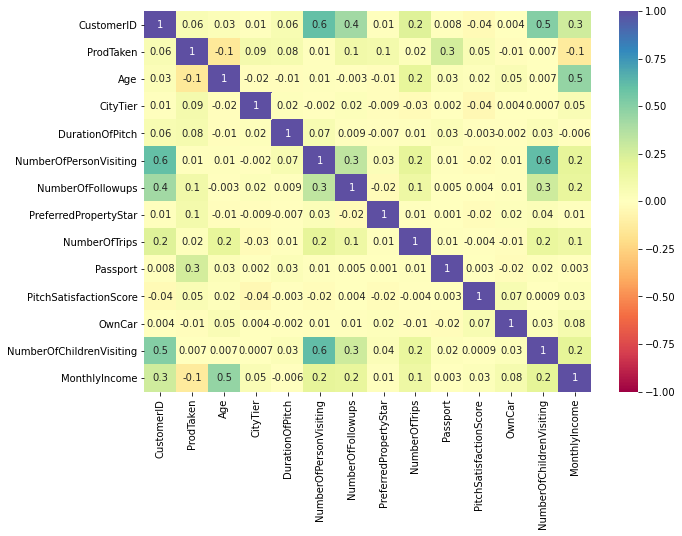

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

- NumberOfChildrenVisiting has a strong positive correlation with NumberOfPersonVisiting
- The MonthlyIncome shows a moderate correlation with Age

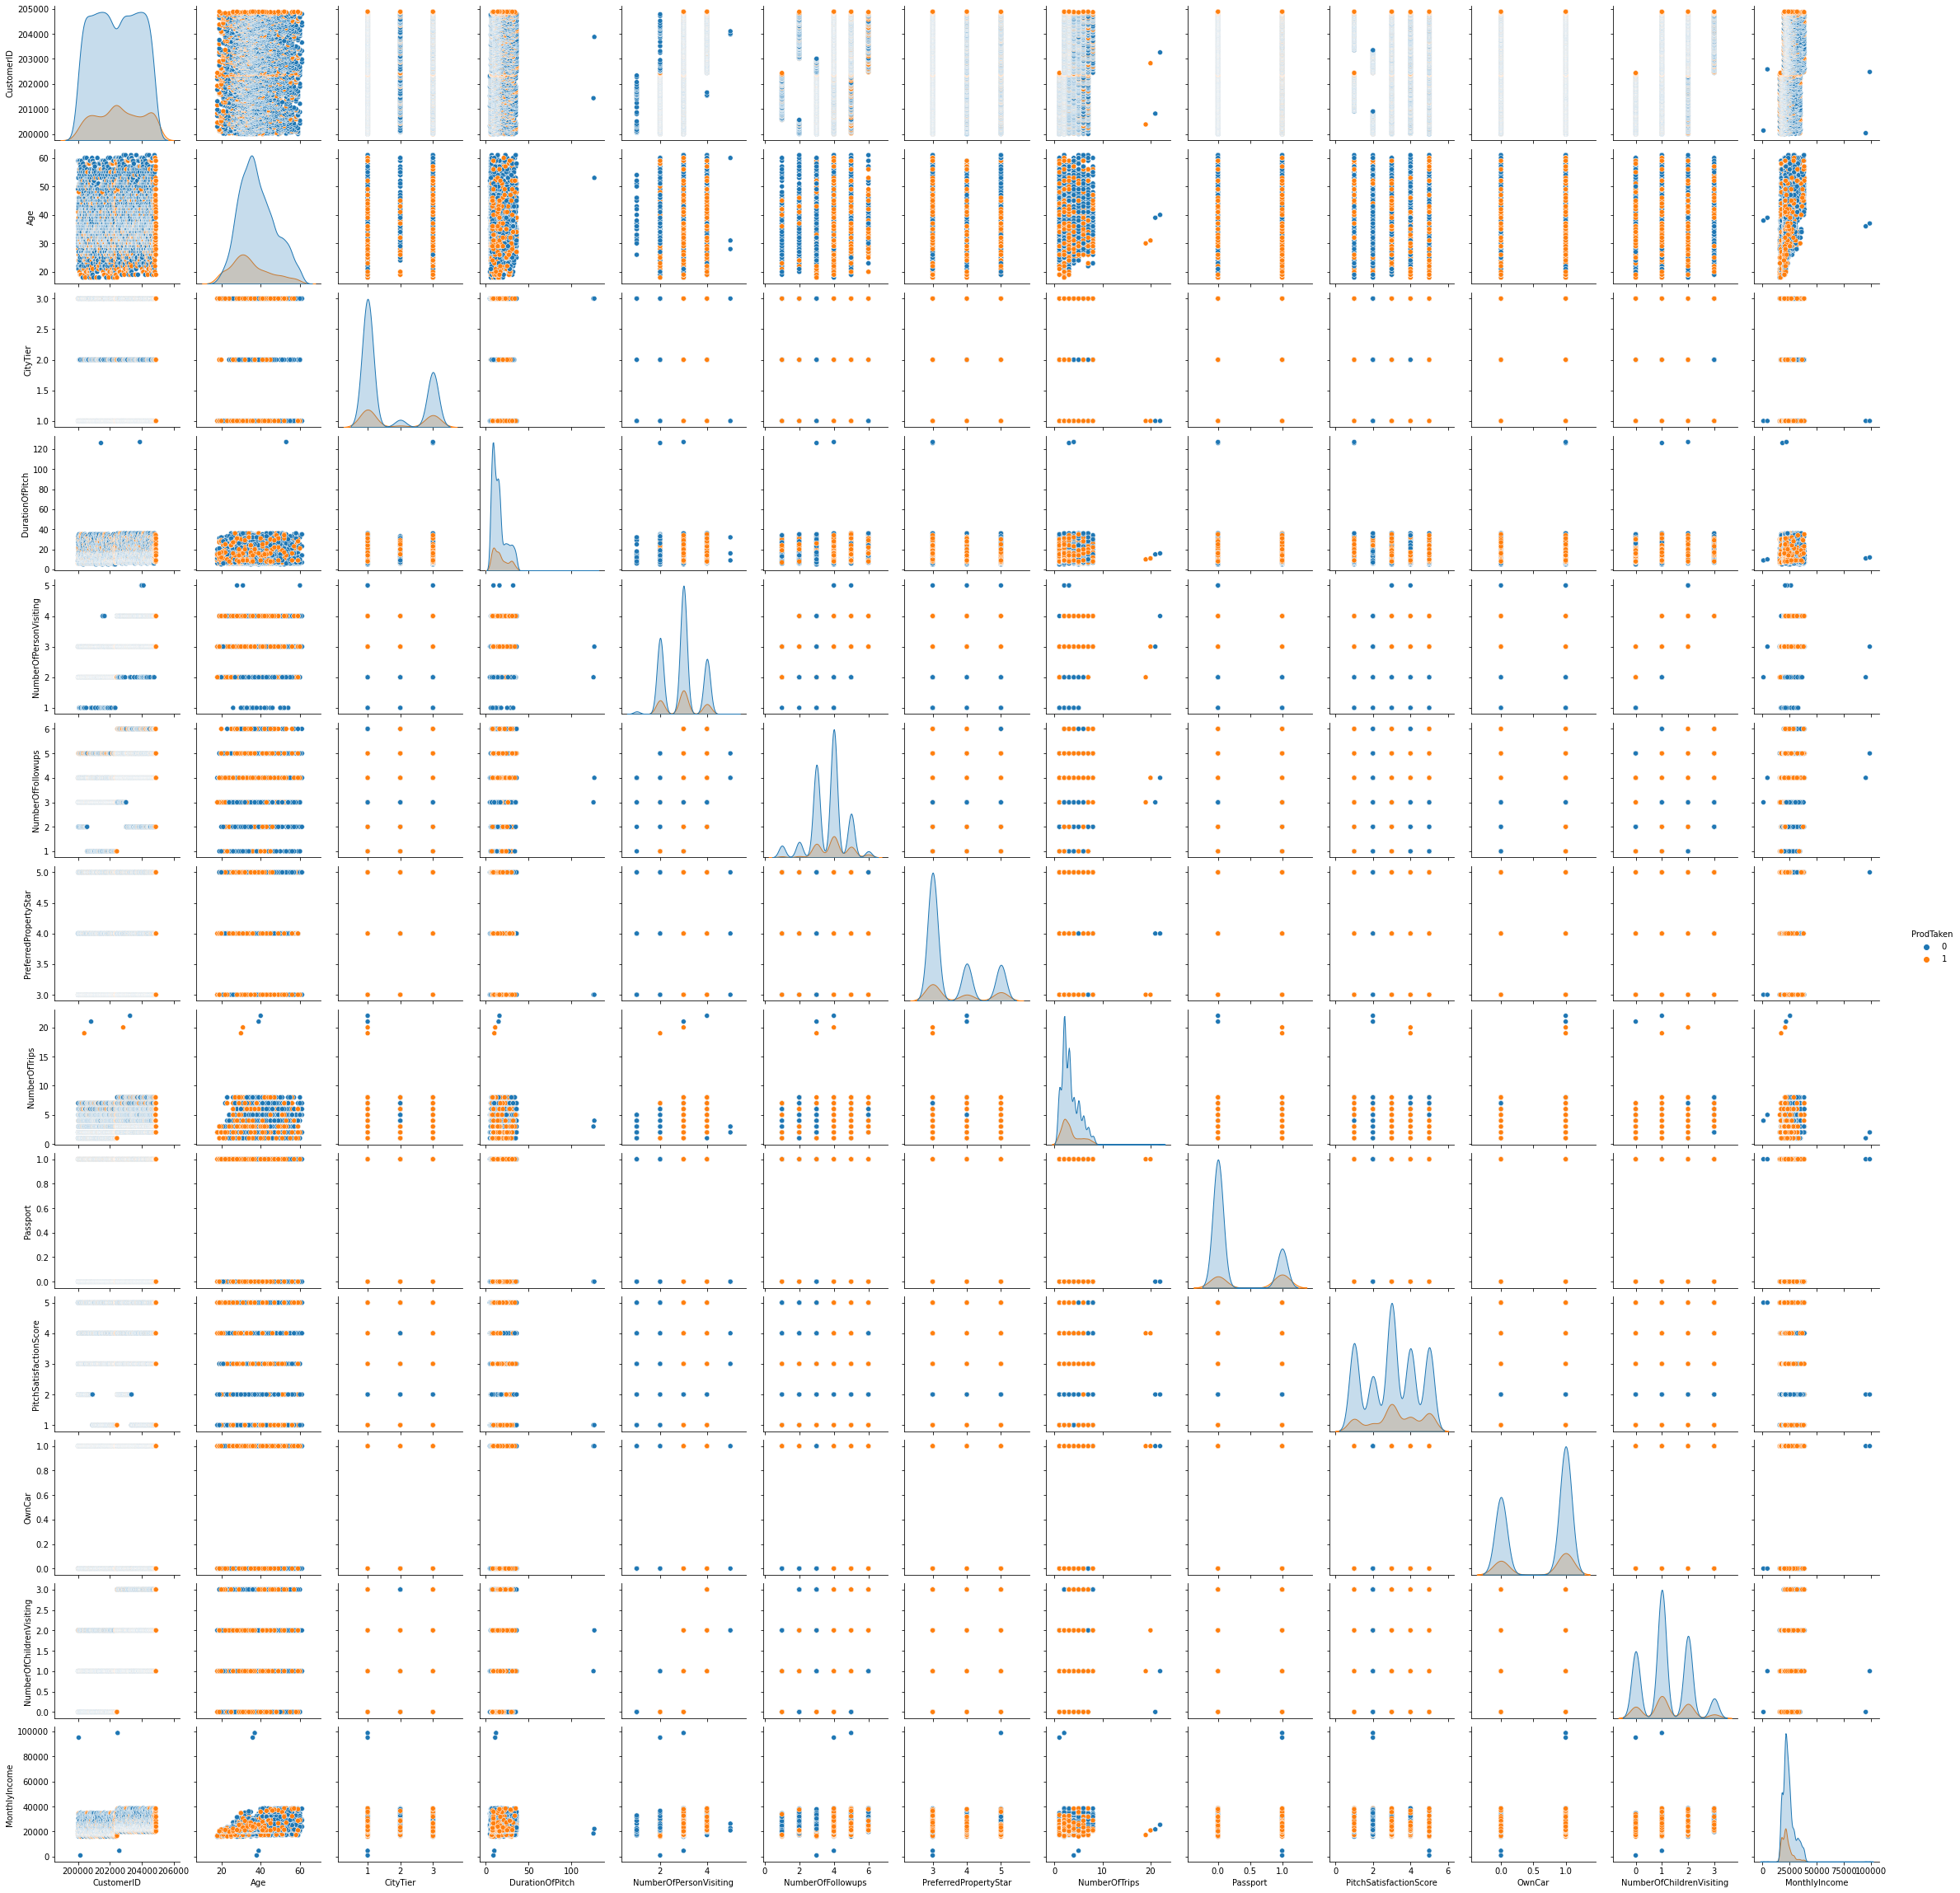

In [25]:
sns.pairplot(data,hue='ProdTaken')
plt.show()

- There are overlaps in the distribution of variables for both classes. Let's explore this further using other plots.

#### ProdTaken vs TypeofContact

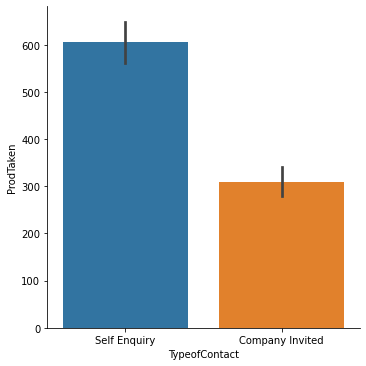

In [36]:
sns.catplot(x="TypeofContact", y='ProdTaken', kind='bar', data=data, size=5, aspect=1, estimator=np.sum);

#### ProdTaken vs CityTier

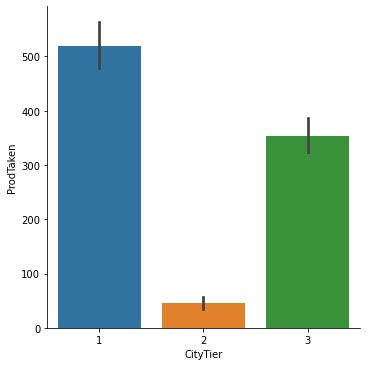

In [37]:
sns.catplot(x="CityTier", y='ProdTaken', kind='bar', data=data, size=5, aspect=1, estimator=np.sum);

#### ProdTaken vs Occupation 

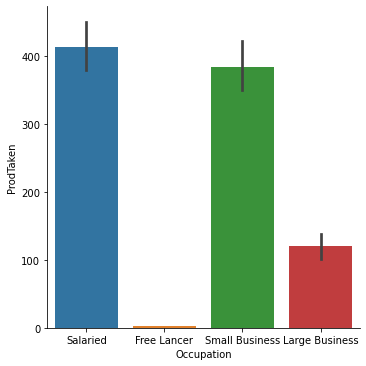

In [38]:
sns.catplot(x="Occupation", y='ProdTaken', kind='bar', data=data, size=5, aspect=1, estimator=np.sum);

#### ProdTaken vs Gender vs Marital status

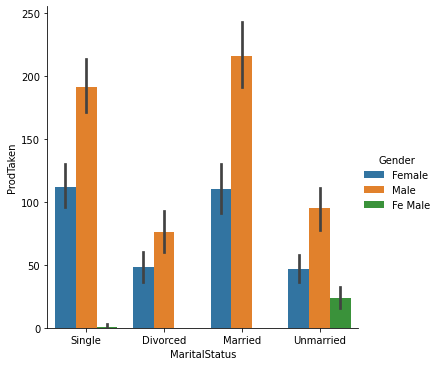

In [34]:
sns.catplot(x="MaritalStatus", y='ProdTaken', kind='bar', hue='Gender',data=data, size=5, aspect=1, estimator=np.sum);

#### *need to change 'fe male' to 'female'

#### ProdTaken vs Designation

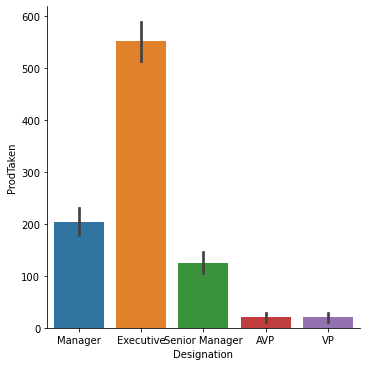

In [39]:
sns.catplot(x="Designation", y='ProdTaken', kind='bar', data=data, size=5, aspect=1, estimator=np.sum);

### EDA Insights on the characteristic of customer profile who purchased the package 

- There is a high possibility of customers who are contacted by self inquiry tend to buy the package compare to customers who are invited by company. We can conclude that customers contact itself to buy the package 
- There are few customers who are invited by company with no interest in buying the package but end up buying it
- Customers who live in the city where it is developed, has high population and living standards
- There are also more than half of the customers who live in the city opposite to the city which is described above
- The occupation of customers who work at a company or work/own a small business
- The are few customers who work/own a large business and free lancer
- Most customers are Male who are married or single
- The number of Female customers tend to be low compare to any marital status of Male
- Most customers work as an executive
- The top 3 occupations are Executive, Manager, and Senior Manager 
- There are almost same amount of customers who work as AVP and VP

### Data Pre-processing

#### Drop unnecessory columns

In [41]:
#Drop 'CustomerID' column because it is unnecessary 
data2 =data.drop(['CustomerID'], axis=1)

In [42]:
data2.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Impute missing values with Median

#### Deal with missing values in 'Age' column

In [43]:
data_age_missing=data[data['Age']!=0] #Create a new table with only non-zero rows
data_age_missing['Age'].median() #Calculate median

36.0

#### Deal with missing values in 'DurationOfPitch' column

In [44]:
data_dop_missing=data[data['DurationOfPitch']!=0] #Create a new table with only non-zero rows
data_dop_missing['DurationOfPitch'].median() #Calculate median

13.0

#### Deal with missing values in 'NumberOfTrips' column

In [45]:
data_not_missing=data[data['NumberOfTrips']!=0] #Create a new table with only non-zero rows
data_not_missing['NumberOfTrips'].median() #Calculate median

3.0

#### Deal with missing values in 'MonthlyIncome' column

In [46]:
data_mi_missing=data[data['MonthlyIncome']!=0] #Create a new table with only non-zero rows
data_mi_missing['MonthlyIncome'].median() #Calculate median

22347.0

#### Replace all the null values with median

In [47]:
data2['Age'] = data2['Age'].fillna(data['Age'].median()) #Fill null value with median
data2['DurationOfPitch'] = data2['DurationOfPitch'].fillna(data['DurationOfPitch'].median()) #Fill null value with median
data2['NumberOfTrips'] = data2['NumberOfTrips'].fillna(data['NumberOfTrips'].median()) #Fill null value with median
data2['MonthlyIncome'] = data2['MonthlyIncome'].fillna(data['MonthlyIncome'].median()) #Fill null value with median

### Remove rows that have null values

In [48]:
data2 = data2.dropna()
data2.isnull().sum().sort_values(ascending=False)

ProdTaken                   0
PreferredPropertyStar       0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
ProductPitched              0
Age                         0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
MonthlyIncome               0
dtype: int64

- No null values exist

#### Correct values; Female in 'Gender' column

In [49]:
#Gender
def corr_gender(Gender):

    if isinstance(Gender, str):
        return str(Gender.replace(" ","")) #If there's object value, change 'fe male' to 'female' 
    else:
        return np.nan #else replace with 'NaN'

data2['Gender'] = data['Gender'].apply(corr_gender)   #Apply  above condition to column 'Gender' in data2 dataset 

### One hot encoding categorical data 

In [50]:
data2 = pd.get_dummies(
    data2,
    columns=data2.select_dtypes(include=["object", "category"]).columns.tolist(), #create dummies including object and category variables in one-hot coding
    drop_first=True,
)
data2.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,0,1,0,0,1,0,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,0,0,0,0,0,0,0,1,0,0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,0,1,0,1,0,0,0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,0,0,0,0,0,0,1,0,0,0
4,0,36.0,1,8.0,2,3.0,4.0,1.0,0,5,...,0,0,0,0,0,0,1,0,0,0


### Deal with outliers 

#### Outlier detection using Z-Score

If the data are normally distributed then we expect the vast majority of points to be within 3 standard deviations of the mean, which corresponds to a z score with an absolute value of at most 3. 

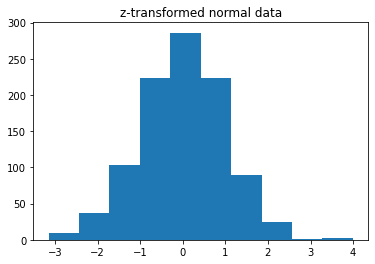

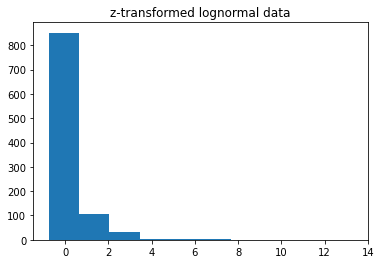

In [51]:
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)

np.random.seed(1)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)


plt.hist(z_transform(x1))
plt.title('z-transformed normal data')
plt.show()


plt.hist(z_transform(x2))
plt.title('z-transformed lognormal data')
plt.show()


All of the points in each plot are drawn from the exact same distribution, so it's not fair to call any of the points outliers in the sense of there being bad data. But depending on the distribution in question, we may have almost all of the z-scores between -3 and 3 or instead there could be extremely large values. 

### Model Building - Bagging 
- Decision Tree, Random Forest

1. Split the data into the train and test set.
2. Train models on the training data.
3. Try to improve the model performance using hyperparameter tuning.
4. Test the performance on the test data.

*Repeat above process for Decision Tree and Random Forest

#### Decision Tree
1. Split the data into the train and test set

In [52]:
X = data2.drop('ProdTaken', axis=1)
y = data2['ProdTaken']

2. Train models on the training data

In [53]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3308, 29) (1418, 29)


In [54]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a classification model
def model_performance_classifier(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [55]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [56]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [57]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [58]:
dtree_model_train_perf=model_performance_classifier(dtree, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)
dtree_model_test_perf=model_performance_classifier(dtree, X_test,y_test)
print("Testing performance \n",dtree_model_test_perf)

Training performance 
    RMSE  MAE  R-squared  Adj. R-squared  MAPE
0   0.0  0.0        1.0             1.0   0.0
Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.324157  0.105078   0.316419        0.302136   inf


- The Decision tree model with default parameters is overfitting the train data.
- The testing performance shows low value in general
- Let's see if I can reduce more overfitting and improve performance on test data by tuning hyperparameters.

3. Hyperparameter Tuning

In [252]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, random_state=1)

In [253]:
dtree_tuned_model_train_perf = model_performance_classifier(dtree_tuned, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    RMSE  MAE  R-squared  Adj. R-squared  MAPE
0   0.0  0.0        1.0             1.0   0.0


4. Test the performance on the test data

In [254]:
dtree_tuned_model_test_perf = model_performance_classifier(dtree_tuned, X_test,y_test)
print("Testing performance \n",dtree_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.345617  0.119451   0.232753        0.213699   inf


- The overfitting hasnt reduced after hyperparameter tuning and the test score has decreased by approx 0.05.
- RMSE has increased by 0.01 and the test model didnt generalized better than the decision tree model with default parameters.

#### Random Forest
1. part skipped 
2. Train models on the training data

In [255]:
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [256]:
rf_estimator_model_train_perf = model_performance_classifier(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    RMSE  MAE  R-squared  Adj. R-squared  MAPE
0   0.0  0.0        1.0             1.0   0.0


In [257]:
rf_estimator_model_test_perf = model_performance_classifier(rf_estimator, X_test,y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.344447  0.118644   0.237937        0.219012   inf


- Random forest is giving a similar good r2 score compared with Decision Tree testing performance.

3. Hyperparameter Tuning

In [258]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=None, n_estimators=120, random_state=1)

In [259]:
rf_tuned_model_train_perf = model_performance_classifier(rf_tuned, X_train, y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
    RMSE  MAE  R-squared  Adj. R-squared  MAPE
0   0.0  0.0        1.0             1.0   0.0


4. Test the performance on the test data

In [260]:
rf_tuned_model_test_perf = model_performance_classifier(rf_tuned, X_test, y_test)
print("Testing performance \n",rf_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.301998  0.091203   0.414197        0.399649   inf


- The testing performance for RMSE and MAE have decreased and r2 value increased
- The overfitting is reduced after hyperparameter tuning

### Model Performance Improvement - Bagging
- Comment on which metric is right for model performance evaluation and why? 
- Comment on the model performance after tuning the Decision Tree, Bagging, and Random Forest classifier to improve the model performance

In [264]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_tuned_model_train_perf.T, rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned
RMSE,0.0,0.116187,0.0,0.0
MAE,0.0,0.013499,0.0,0.0
R-squared,1.0,0.913377,1.0,1.0
Adj. R-squared,1.0,0.912467,1.0,1.0
MAPE,0.0,inf,0.0,0.0


In [265]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_tuned_model_test_perf.T, rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned
RMSE,0.332525,0.345617,0.344447,0.301998
MAE,0.110573,0.119451,0.118644,0.091203
R-squared,0.289778,0.232753,0.237937,0.414197
Adj. R-squared,0.272140,0.213699,0.219012,0.399649
MAPE,inf,inf,inf,inf


- The tuned random forest model is the best model here. It has the highest r2 score of approx 41.4% and the lowest RMSE of approx 30 on the test data.
- Random forest, decision tree, and random forest estimator are the top 3 models. They are all giving a similar performance.

### Model building - Boosting
- Build Adaboost, GradientBoost, XGBoost, and Stacking classifiers 
- Comment on model performance

#### Adaboost

In [275]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

2. Train models on the training data

In [276]:
ab_classifier_model_train_perf = model_performance_classifier(ab_regressor, X_train,y_train)
print("Training performance \n",ab_classifier_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.362198  0.131187   0.158197        0.149361   inf


In [277]:
ab_classifier_model_test_perf = model_performance_classifier(ab_regressor, X_test,y_test)
print("Testing performance \n",ab_classifier_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.402775  0.162228  -0.042004       -0.067882   inf


- AdaBoost is generalizing well but it is giving poor performance
- RMSE and MAE have increased and r2 score dropped down to negative  

3. Hyperparameter Tuning

In [278]:
# Choose the type of classifier. 
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=80, random_state=1)

In [279]:
print("Training performance \n",ab_tuned_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.364579  0.132918   0.147092        0.138139   inf


4. Test the performance on the test data

In [280]:
ab_tuned_model_test_perf = model_performance_classifier(ab_tuned, X_test,y_test)
print("Testing performance \n",ab_tuned_model_train_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.364579  0.132918   0.147092        0.138139   inf


- There is no significant improvement in the model after hyperparameter tuning.

#### GradientBoost

In [ ]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

In [ ]:
gb_estimator_model_train_perf = model_performance_classifier(gb_estimator, X_train,y_train)
print("Training performance \n",gb_estimator_model_train_perf)

In [ ]:
gb_estimator_model_test_perf = model_performance_classifier(gb_estimator, X_test, y_test)
print("Testing performance \n",gb_estimator_model_test_perf)

- Gradient boosting is generalizing well giving decent increase in RMSE
- The r2 score has dropped significantly results. Let's see how the tuned value turns out

#### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

In [ ]:
gb_tuned_model_train_perf = model_performance_classifier(gb_tuned, X_train,y_train)
print("Training performance \n",gb_tuned_model_train_perf)

In [ ]:
gb_tuned_model_test_perf = model_performance_classifier(gb_tuned, X_test, y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

- //
- We can see that the model has improved significantly in terms of r2 score and RMSE.
- The r2 score has increased by approx 12% on the test data.
- RMSE has decreased by more than 30 for the test data.

#### XGBoost

In [ ]:
xgb_estimator=XGBClassifier(random_state=1)
xgb_estimator.fit(X_train,y_train)

In [ ]:
xgb_estimator_model_train_perf = model_performance_classifier(xgb_estimator, X_train, y_train)
print("Training performance \n",xgb_estimator_model_train_perf)

In [ ]:
xgb_estimator_model_test_perf = model_performance_classifier(xgb_estimator, X_test,y_test)
print("Testing performance \n",xgb_estimator_model_test_perf)

- //
- XGBoost with default parameters is giving almost as good results as the tuned gradient boosting model.

##### *Hyperparameter tuning skipped for time complexity issue

#### Stacking Classifier

In [ ]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [ ]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

In [ ]:
stacking_estimator_model_train_perf = model_performance_classifier(stacking_estimator, X_train, y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

In [ ]:
stacking_estimator_model_test_perf = model_performance_classifier(stacking_estimator, X_test, y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

- //

### Model performance improvement - Boosting
- Comment on which metric is right for model performance evaluation and why? 
- Comment on the model performance after tuning the AdaBoost, and Gradient Boosting classifier on the appropriate metric to improve the model performance. 
* Please note XGBoost can take a significantly longer time to run, so if you have time complexity issues then you can avoid tuning XGBoost.

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [ab_classifier_model_train_perf.T,ab_tuned_model_train_perf.T,gb_estimator_model_train_perf.T,gb_tuned_model_train_perf.T,
    xgb_estimator_model_train_perf.T,stacking_estimator_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB"
    "Stacking Classifier"
]

print("Training performance comparison:")
models_train_comp_df

In [ ]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [ab_classifier_model_test_perf.T,ab_tuned_model_test_perf.T,gb_estimator_model_test_perf.T,gb_tuned_model_test_perf.T,
    xgb_estimator_model_test_perf.T,stacking_estimator_model_test_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB"
    "Stacking Classifier"
]

print("Testing performance comparison:")
models_test_comp_df

- //

### Actionable Insights & Recommendations
- Compare model performance on various metrics.
- Conclude with the key takeaways
- What would your advice be to grow the business?

### Business Recommendations:
- //
- We can use this predictive model for any season and environmental parameters (which we know in advance) and can predict the count of the bikes to be rented. The ability to predict the number of hourly users can allow the entities (businesses/governments) that oversee these systems to manage them more efficiently and cost-effectively.
- More bikes can be made available for the fall and winter seasons as the number of bikes rented is high in these seasons.
- As the number of bikes rented is high for day timings compared to night timings, similarly, fall and winter seasons have more surges compared to other seasons. We can choose differential prices of bikes accordingly.
- As most of the rentals are for commuting to workplaces and colleges daily, company can launch more stations near busy workplaces or schools/colleges to reach out to their main customers.
- Number of bikes rented is heavily dependent on the weather. So, we should adjust the number of available bikes in an area based on the weather forecast.
- Maintenance activities for bikes can be done at night due to low usage of bikes during the nighttime.
- Company can provide offers or coupons like a monthly subscription to compensate for the low count on holidays or weekends.